In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

width = 17
height = 5
matplotlib.rcParams['figure.figsize'] = [width, height]
matplotlib.rcParams['lines.markersize'] = 0.5
matplotlib.rcParams['scatter.edgecolors'] = "black"

In [2]:
def mfft(arr ,draw=False, x1 = 0, x2 = -1):
    if x2 == -1:
        x2 = len(arr) // 2 + 1
    print(len(arr))
    plt.rcParams['axes.grid'] = True
    plt.tight_layout()
    A = np.fft.rfft(arr - np.mean(arr))
    if (draw):
        plt.rcParams['axes.grid'] = True
        fig, ax = plt.subplots(2, figsize=(6,4), dpi=150)
        plt.tight_layout()
        n = np.arange(len(arr))
        n1 = len(arr) / n[1:]
        plt.subplots_adjust(hspace = 0.5)
        ax[0].plot(n, arr, '.-')
        ax[0].set_title('$a[n]$')
        ax[1].set_title('$A$')
        ax[1].set_xlim(x1, x2)
        ax[1].plot(n1[0 : (len(arr) // 2 + 1)], np.abs(A), '-')
        ax[1].set_xlabel('Период')
        plt.show()
        
    return np.abs(A)

In [3]:
n = 1000
batch_n = 10
generator = np.random.RandomState(42)

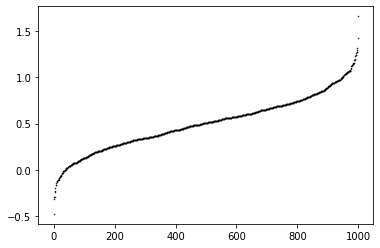

In [4]:
a = generator.normal(0.5, 0.3, n)
a.sort()
plt.scatter(np.arange(n), a)

$x_t = px_{t-1} + \xi_t$


В ```noise_maker``` передается функция $\xi_t = N(\sin(wt), 0.3)$

In [5]:
def ar(p, arr, noise_maker, to_add = 10000):
    new_vals = np.array(arr)
    new_vals = np.append(new_vals, [0] * to_add)
    pos = 1
    for i in range(to_add):
        noise = noise_maker(i)
        new_vals[pos + i] = p * new_vals[pos + i - 1] + noise
    return new_vals

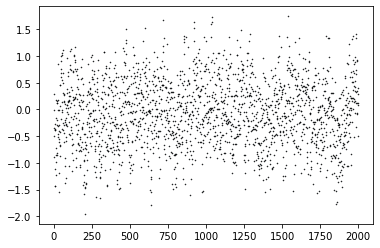

In [6]:
n_to_plot = 2000
w = 10
f1 = lambda t: generator.normal(np.sin(w * t), 0.3)
to_plot = ar(0.8, generator.normal(0.5, 0.3), f1, 5000)[-n_to_plot:]
plt.scatter(np.arange(n_to_plot), to_plot)

2000


<Figure size 432x288 with 0 Axes>

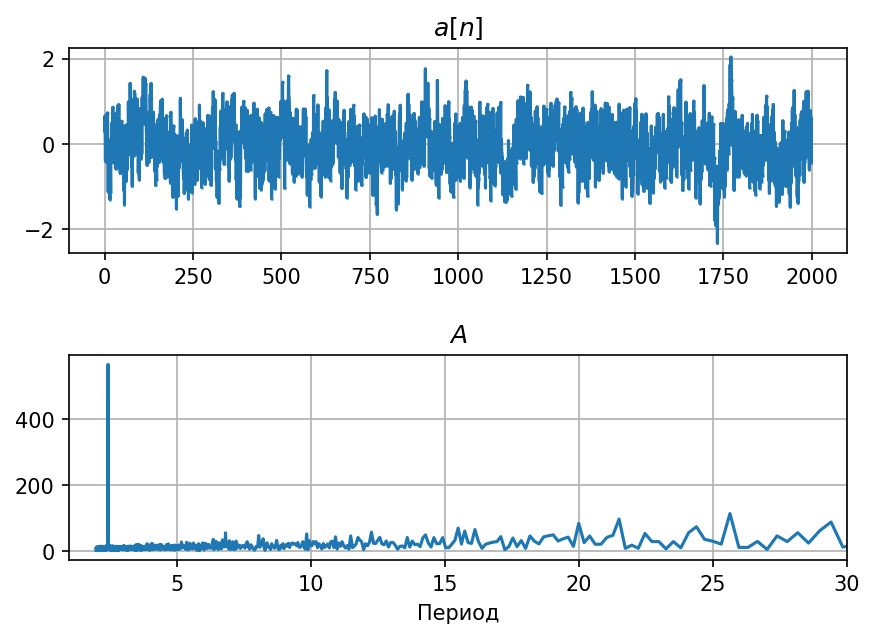

array([8.43769499e-15, 2.67350516e+01, 4.99438316e+01, ...,
       5.04115720e+00, 5.30820581e+00, 8.70004575e-01])

In [7]:
mfft(ar(0.8, generator.normal(0.5, 0.3), f1, 5000)[-n_to_plot:], True, 1, 30)

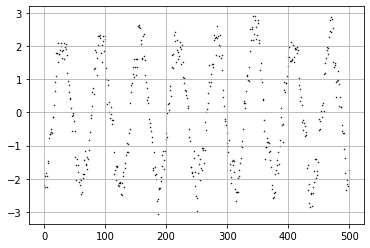

In [8]:
n_to_plot = 500
w = 0.1
f1 = lambda t: generator.normal(np.sin(w * t), 0.3)
to_plot = ar(0.55, generator.normal(100, 6), f1, 500000)[-n_to_plot:]
plt.scatter(np.arange(n_to_plot), to_plot)

500


<Figure size 1224x360 with 0 Axes>

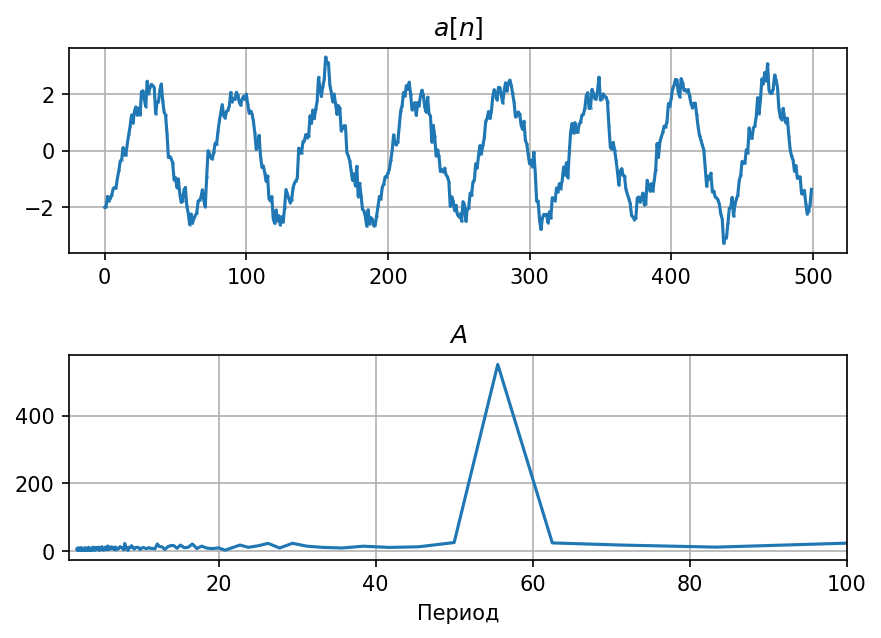

In [45]:
ans =mfft(ar(0.55, generator.normal(100, 6), f1, 500000)[-n_to_plot:], True, 1, 100)

$\xi_t = N(\sin(0.1t) + \sin(0.2t), 0.3)$

$p = 0.9$

$x_t = 0.9x_{t-1} + \xi_t$

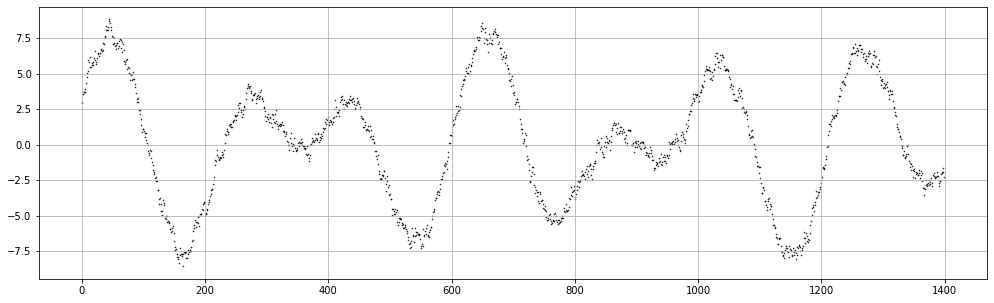

In [46]:
n_to_plot = 1400
w1 = np.pi * 2 / 200
w2 = np.pi * 2 / 317
f1 = lambda t: generator.normal(np.sin(w1 * t) + np.sin(w2 * t), 0.3)
to_plot = ar(0.75, generator.normal(100, 6), f1, 1000000)[-n_to_plot:]
plt.scatter(np.arange(n_to_plot), to_plot)

1400


<Figure size 1224x360 with 0 Axes>

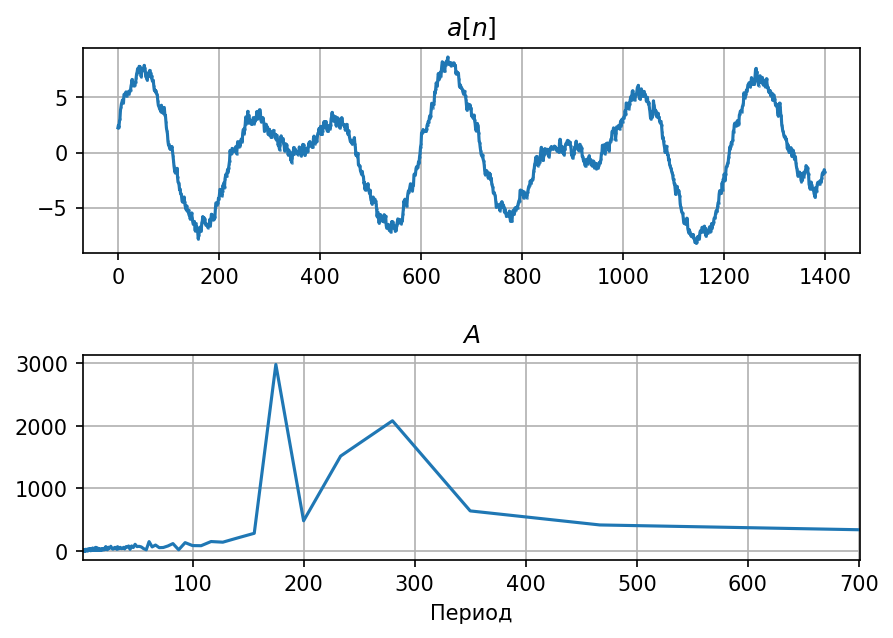

In [48]:
ans =mfft(ar(0.75, generator.normal(100, 6), f1, 1000000)[-n_to_plot:], True, 1)

$\xi_t = N(\sin(0.08t), 0.3)$

$p = 0.55$

$x_t = 0.55x_{t-1} + \xi_t$

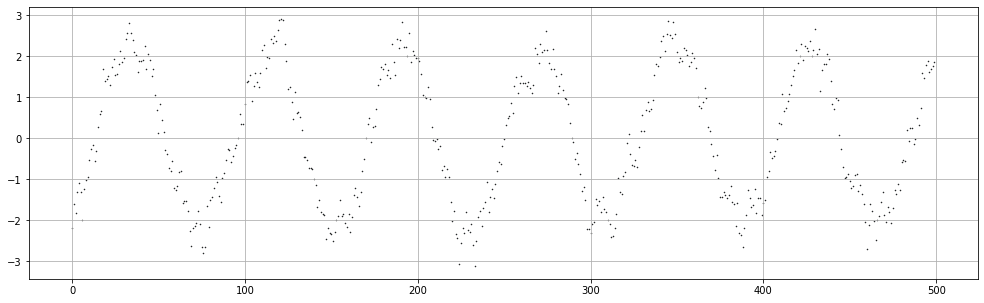

In [49]:
n_to_plot = 500
w = 0.08
f1 = lambda t: generator.normal(np.sin(w * t), 0.3)
to_plot = ar(0.55, generator.normal(100, 6), f1, 500000)[-n_to_plot:]
plt.scatter(np.arange(n_to_plot), to_plot)

500


<Figure size 1224x360 with 0 Axes>

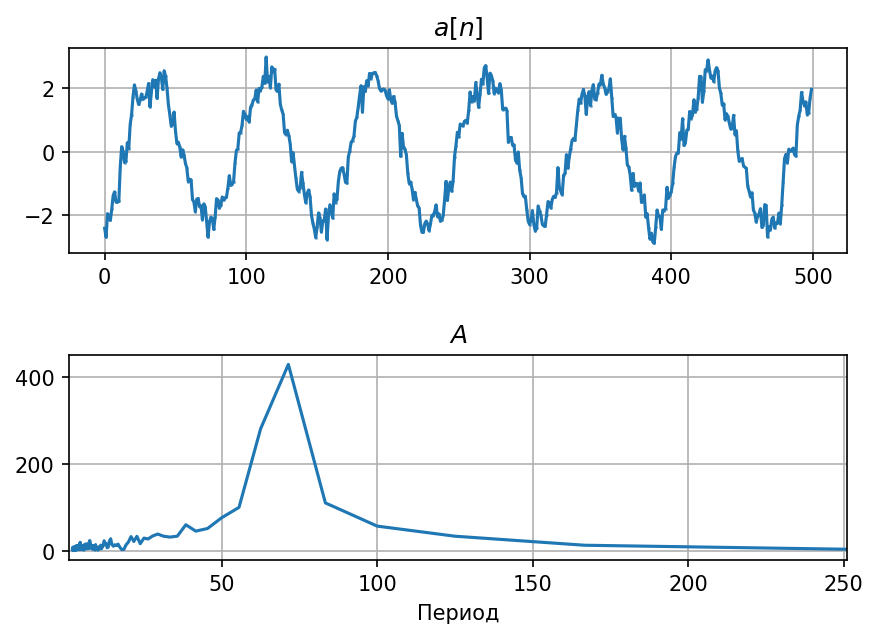

In [50]:
ans =mfft(ar(0.55, generator.normal(100, 6), f1, 500000)[-n_to_plot:], True, 1)

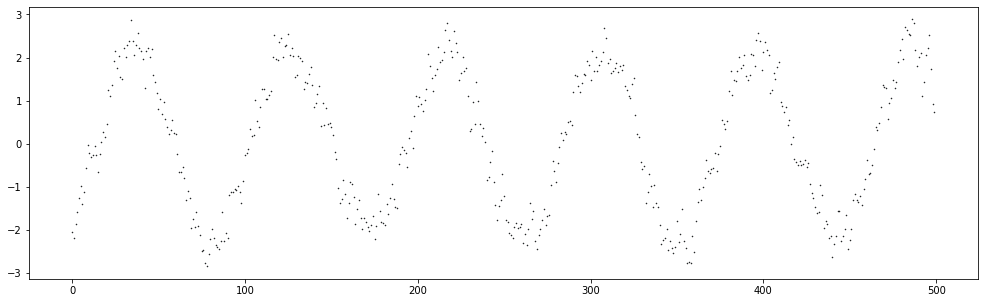

In [24]:
n_to_plot = 500
w = 0.07
f1 = lambda t: generator.normal(np.sin(w * t), 0.3)
to_plot = ar(0.55, generator.normal(100, 6), f1, 500000)[-n_to_plot:]
plt.scatter(np.arange(n_to_plot), to_plot)

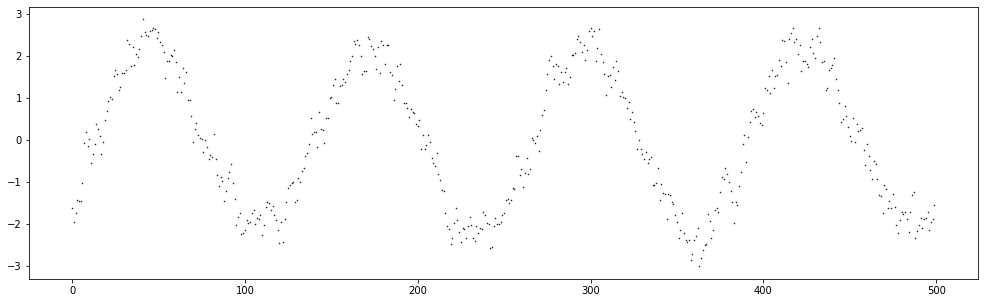

In [25]:
n_to_plot = 500
w = 0.05
f1 = lambda t: generator.normal(np.sin(w * t), 0.3)
to_plot = ar(0.55, 100 * generator.normal(100, 6), f1, 500000)[-n_to_plot:]
plt.scatter(np.arange(n_to_plot), to_plot)

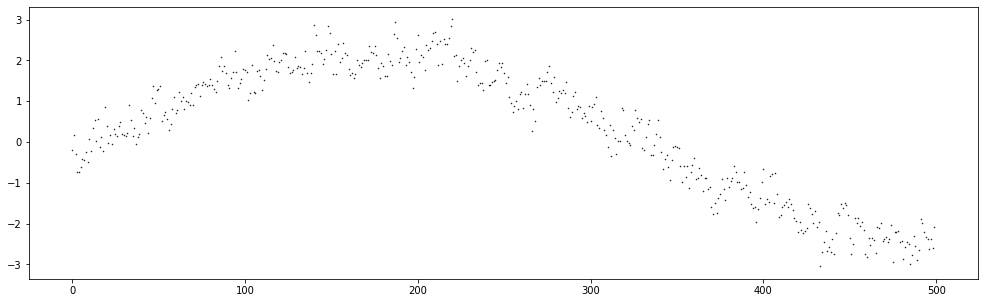

In [26]:
n_to_plot = 500
w = 0.01
f1 = lambda t: generator.normal(np.sin(w * t), 0.3)
to_plot = ar(0.55, generator.normal(100, 6), f1, 500000)[-n_to_plot:]
plt.scatter(np.arange(n_to_plot), to_plot)

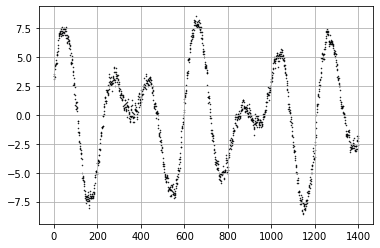

In [9]:
n_to_plot = 100000
w1 = np.pi * 2 / 200
w2 = np.pi * 2 / 317
f1 = lambda t: generator.normal(np.sin(w1 * t) + np.sin(w2 * t), 0.3)
to_plot = ar(0.75, generator.normal(100, 6), f1, 1000000)[n_to_plot:]
plt.scatter(np.arange(1400), to_plot[-1400:])

900001


<Figure size 432x288 with 0 Axes>

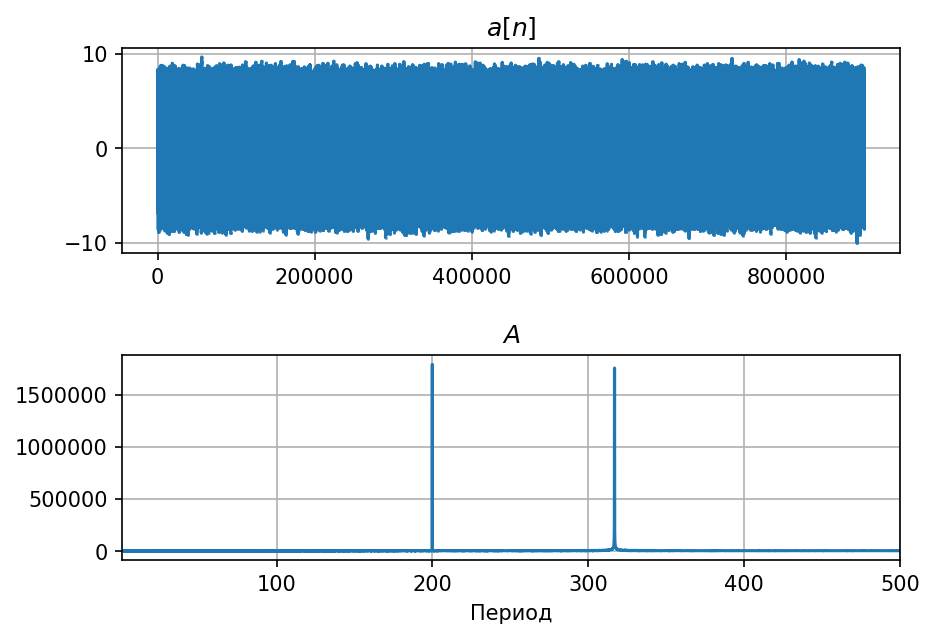

In [10]:
ans =mfft(to_plot, True, 1, 500)

50000


<Figure size 432x288 with 0 Axes>

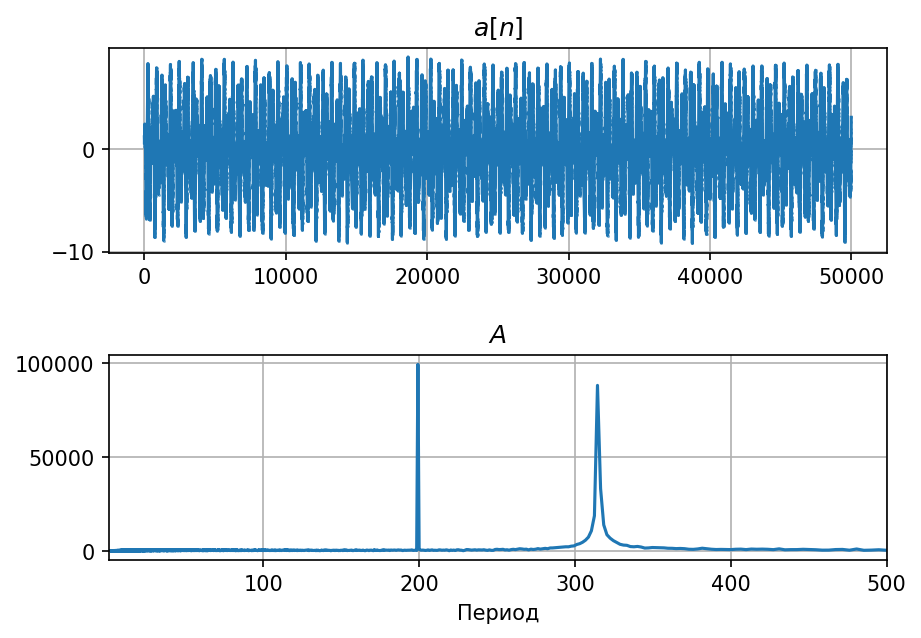

In [11]:
ans =mfft(to_plot[:50000], True, 1, 500)

10000


<Figure size 432x288 with 0 Axes>

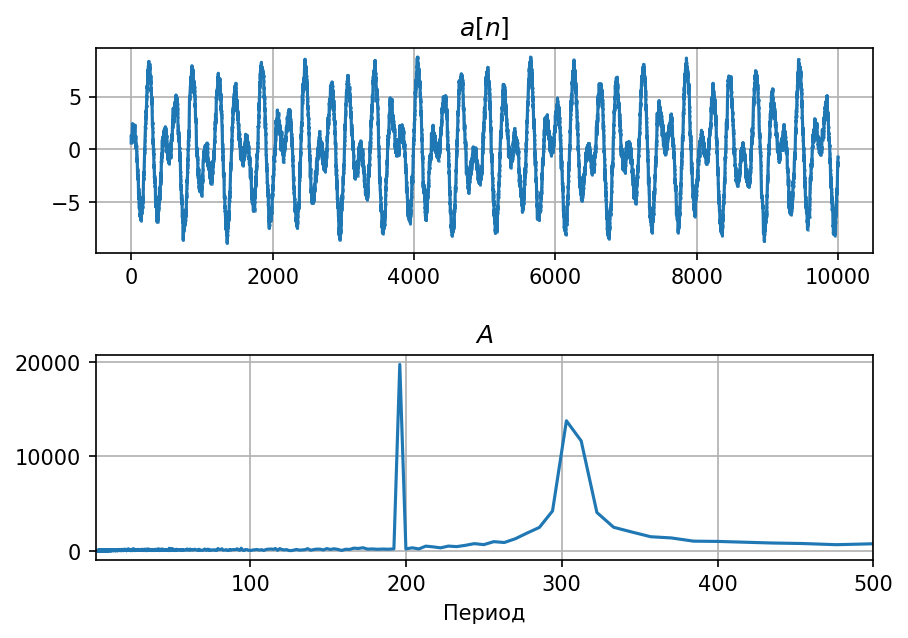

In [12]:
ans =mfft(to_plot[:10000], True, 1, 500)

5000


<Figure size 432x288 with 0 Axes>

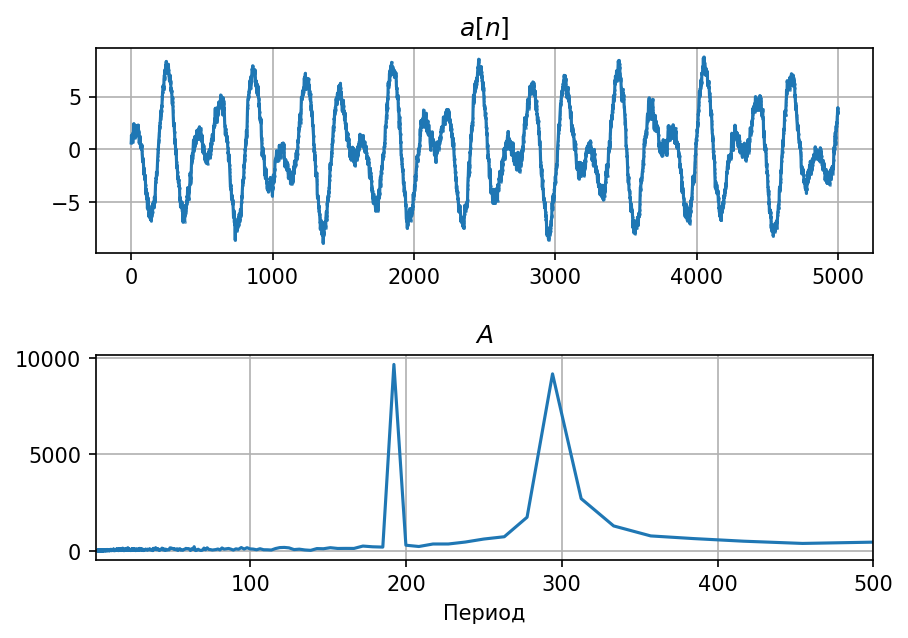

In [13]:
ans =mfft(to_plot[:5000], True, 1, 500)

1000


<Figure size 432x288 with 0 Axes>

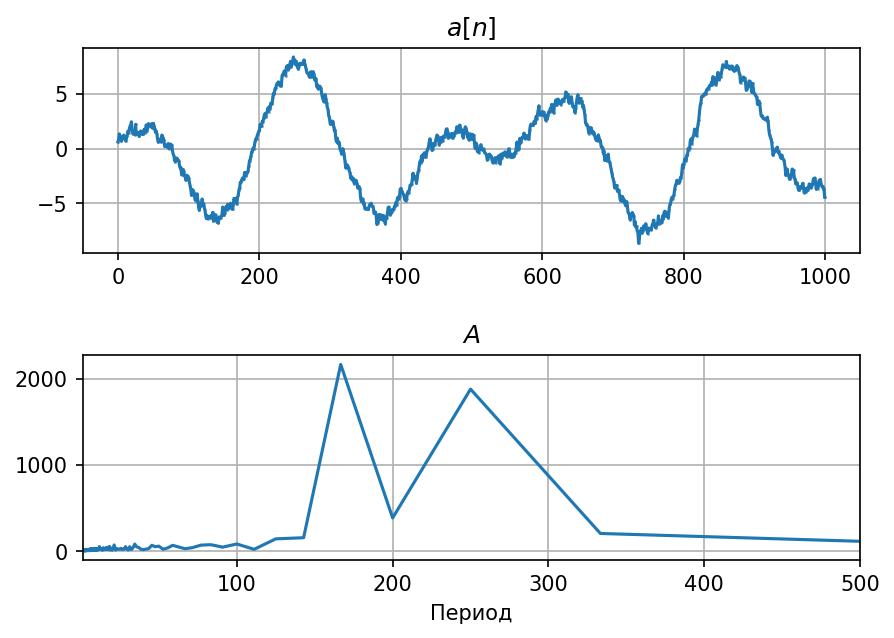

In [14]:
ans =mfft(to_plot[:1000], True, 1, 500)

674


<Figure size 432x288 with 0 Axes>

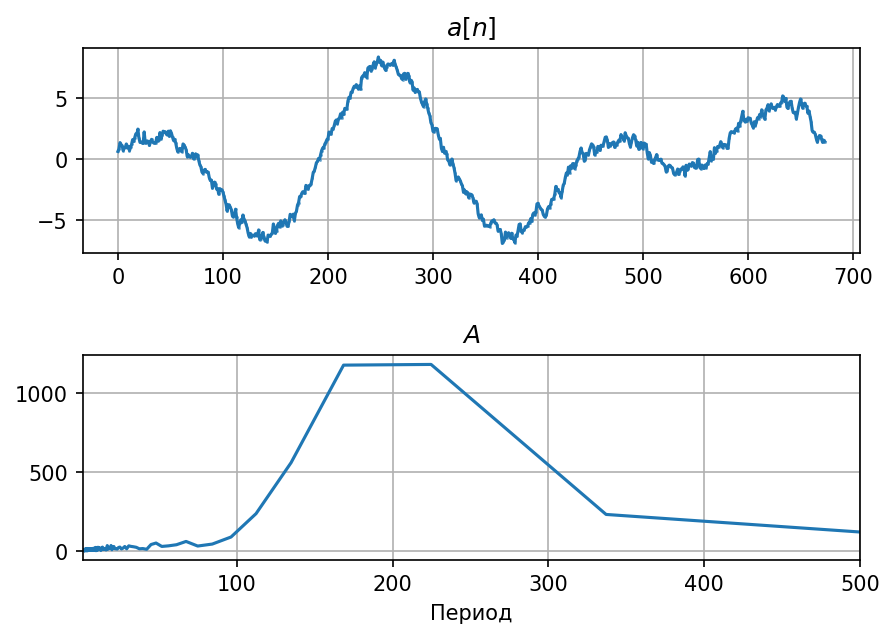

In [19]:
ans =mfft(to_plot[:674], True, 1, 500)

750


<Figure size 432x288 with 0 Axes>

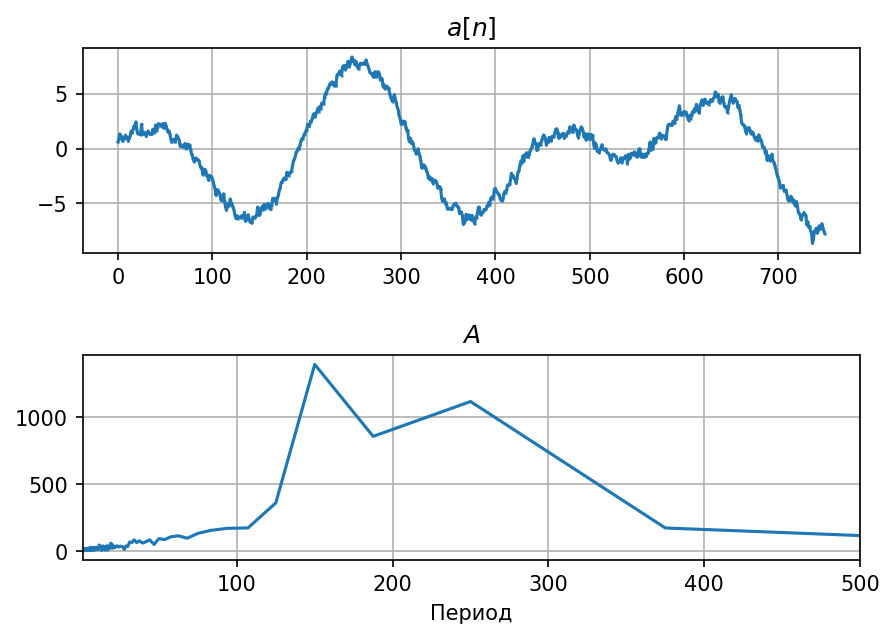

In [16]:
ans =mfft(to_plot[:750], True, 1, 500)

1200


<Figure size 432x288 with 0 Axes>

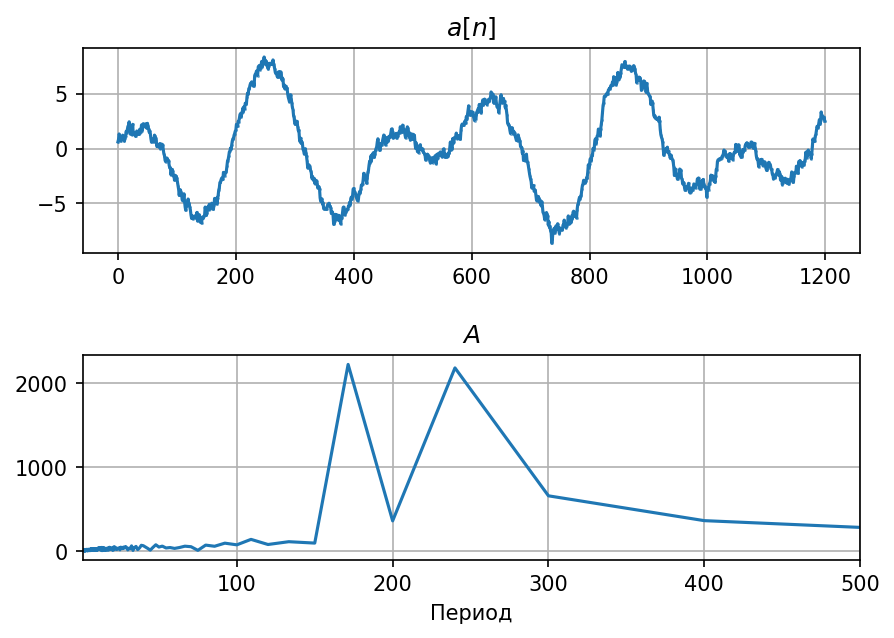

In [17]:
ans =mfft(to_plot[:1200], True, 1, 500)